In [4]:
import Inception
from keras.preprocessing.image import ImageDataGenerator
from os.path import join
import matplotlib.pyplot as plt
from keras.models import load_model, Model
import pickle
import cv2
import numpy as np
from keras import backend as K

Using TensorFlow backend.


In [7]:
inception_v3=Inception.InceptionV3(include_top=False)#, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
vgg_conv=inception_v3

AttributeError: 'NoneType' object has no attribute 'image_data_format'

In [5]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-8]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0xb26eeccf8> False
<keras.layers.convolutional.Conv2D object at 0xb26eec748> False
<keras.layers.normalization.BatchNormalization object at 0xb26eecef0> False
<keras.layers.core.Activation object at 0xb26eff748> False
<keras.layers.convolutional.Conv2D object at 0xb26f40dd8> False
<keras.layers.normalization.BatchNormalization object at 0xb26f80be0> False
<keras.layers.core.Activation object at 0xb26f80cc0> False
<keras.layers.convolutional.Conv2D object at 0xb2700d4a8> False
<keras.layers.normalization.BatchNormalization object at 0xb2702eb00> False
<keras.layers.core.Activation object at 0xb2706e0f0> False
<keras.layers.pooling.MaxPooling2D object at 0xb270e4630> False
<keras.layers.convolutional.Conv2D object at 0xb270ace48> False
<keras.layers.normalization.BatchNormalization object at 0xb2717ff98> False
<keras.layers.core.Activation object at 0xb2717ff28> False
<keras.layers.convolutional.Conv2D object at 0xb271b1898> False
<keras.lay

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense,GlobalAveragePooling2D, Dropout 
# Create the model
#model = models.Sequential()
base_model=inception_v3
# Add the vgg convolutional base model
#model.add(vgg_conv)
x=base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(base_model.input, outputs=predictions)# Add new layers
#model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [8]:
#MODEL_TO_EVAL = '/Users/sidgupta/Downloads/NASNetMobile.hdf5'
DATA_DIR = '/Users/sidgupta/Documents/mura'
#EVAL_CSV = 'valid.csv'
data_dir = DATA_DIR


EVAL_DIR = join(data_dir, 'humerus')
PRED_DIR = join(data_dir, 'humerus_v')

In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 200
val_batchsize = 20
 
train_generator = train_datagen.flow_from_directory(
        EVAL_DIR,
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        PRED_DIR,
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

Found 1272 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
with open('test_pickle.pkl', 'wb') as pickle_out:  
    pickle.dump(history, pickle_out)    
# Save the model
model.save('small_last4.h5')

Epoch 1/10
7/6 [=================================] - 392s 56s/step - loss: 0.8657 - acc: 0.5507 - val_loss: 0.6891 - val_acc: 0.6181
Epoch 2/10
7/6 [=================================] - 357s 51s/step - loss: 0.7244 - acc: 0.5972 - val_loss: 0.6853 - val_acc: 0.6285

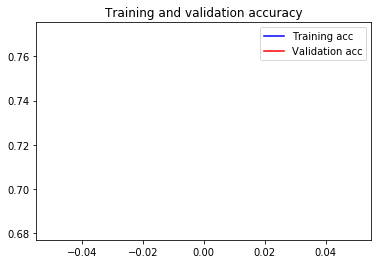

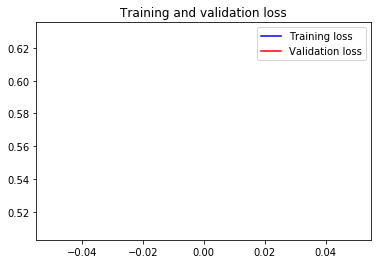

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [75]:
with open('test_pickle.pkl', 'rb') as pickle_in:  
    unpickled_cucumber = pickle.load(pickle_in)

print(unpickled_cucumber)  

In [76]:
history=unpickled_cucumber

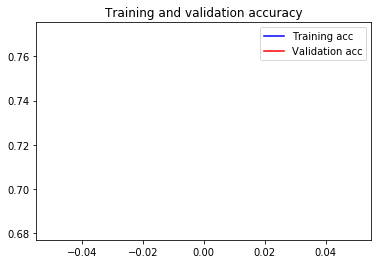

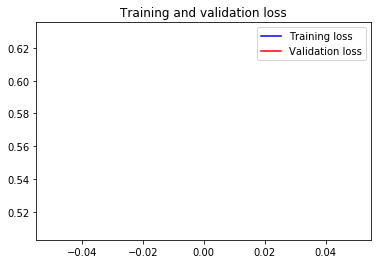

In [77]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [78]:
    def global_average_pooling(x):
        return K.mean(x, axis = (2, 3))
    
    def global_average_pooling_shape(input_shape):
        return input_shape[0:2]